## List 5

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import io
import statsmodels.formula.api as smf
import scipy.stats as stats

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916


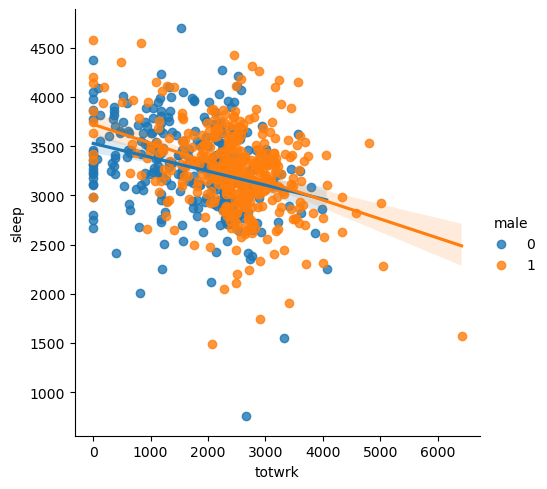

In [5]:
sns.lmplot(data=df, y='sleep', x='totwrk', hue='male')

In [6]:
sleep_df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
sleep_df['sleep60'] = sleep_df['sleep']/60 # создадим столбец часов времени
# Отфильтруем датафрейм по гендерному признаку
sleep_male = sleep_df[sleep_df['male']==1] # Датафрейм для мужчин
sleep_female = sleep_df[sleep_df['male']==0] # Датафрейм дла женщин

In [7]:
sleep_male

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq,sleep60
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,3438,0,3438,0,14,0,13,7.070004,1024,51.883333
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,5020,0,5020,0,11,0,0,1.429999,961,48.666667
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,2815,0,2815,0,21,0,0,20.529997,1936,44.500000
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,2580,0,2580,0,44,0,33,2.750000,4096,57.466667
5,41,0,6,0.000000,0.000000,12,0,1,1,4812,...,1205,0,0,1205,23,0,23,19.249998,1681,67.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,50,0,693,0.182331,0.030075,12,2500,1,0,4417,...,2603,0,2603,0,32,0,22,NaN,2500,51.000000
694,44,0,695,0.182331,0.030075,16,16250,1,0,4539,...,2513,0,2513,0,22,0,19,NaN,1936,50.466667
695,29,0,696,0.182331,0.030075,16,16250,1,0,4639,...,2418,0,2418,0,7,1,5,NaN,841,50.383333
699,61,0,700,0.182331,0.030075,17,27500,1,0,4362,...,2725,0,2725,0,38,0,30,NaN,3721,49.883333


In [8]:
slp = smf.ols(data= sleep_df, formula='sleep60~totwrk+age+I(age**2)+south +smsa +marr').fit()
slp_ml = smf.ols(data= sleep_male, formula='sleep60~totwrk+age+I(age**2)+south +smsa +marr').fit()
slp_fml = smf.ols(data= sleep_female, formula='sleep60~totwrk+age+I(age**2)+south +smsa +marr').fit()

$$
H_0 : \beta_{marr} = \gamma_{marr}; \sigma_1^2 = \sigma_2 ^2
$$

$$
F_{obs} = (RSS - (RSS_1+RSS_2))/(RSS_1+RSS_2) * (n_1+n_2-2*m)/m
$$

In [9]:
F_obs =( slp.ssr - (slp_ml.ssr + slp_fml.ssr) )/((slp_ml.ssr + slp_fml.ssr)) * ((len( sleep_female ) + len( sleep_male ) - 2*7) / 7)
F_obs

1.5506147376999122

In [11]:
print(f'RSS:{slp.ssr.round(2)}, RSS_1:{slp_ml.ssr.round(2)},RSS_2:{slp_fml.ssr.round(2)} ')

RSS:33859.8, RSS_1:17618.98,RSS_2:15717.91 


In [12]:
alpha = 0.01
stats.f.ppf(1-alpha,7,len( sleep_female ) + len( sleep_male ) - 2*7)

2.6651528022423494

Вывод:
$F_ {obs} < F_ {cr} $, данные согласуются с нулевой гипотезой. Структурные различия незначимы